# HW 0 Solutions.

### a) 

First thing I want to do is convert the given values into mks, we're physisits, we never deal with imperioal units. Pitchers mound is 18.44 meters away from home plate, and raised 0.254 meters above the ground. The ball is released 1.524 meters above the top of the pitchers mound.  The strike zone is 0.762 meters above the groud. 

I'm going to pick the origin of my coordinate system to be the ground on top of the pitchers mound. So the ball will be launched at x_launch, and needs to pass x_sz to be a strike. 

The launch speed, $v_{0}$ is 22.35 m/s

In [1]:
x_launch = [0, 1.778]
x_sz = [18.44, .762]
v_0 = 22.35

I want to use the standard projectile motion equations.

$x_f = x_i + v_{0x} t + \frac{1}{2}a_x t^2$

$y_f = y_i + v_{0y} t + \frac{1}{2}a_y t^2$

For our problem x_launch = x_i, and x_sz = x_f. This gives us two equations and two unknowns that we can solve for.

After doing a little bit of algebra we end up with an equation for theta. 

$y_f = y_i + v_0 \sin(\theta) \frac{\Delta x}{v_0 \cos(\theta)} + \frac{1}{2}a_y (\frac{\Delta x}{v_0 \cos(\theta)})^2$

Where $\Delta x = x_f - x_i$. We know all of these varriables except for theta. Now the problem is that this equation can't be solved by hand. But that's why we use computers!

In [2]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 2/bisect.py'
import numpy as np
def bisect(func_name, xL, xR):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL)
    fR = func_name(xR)
    #print("Function at the left: {} \nFunction at the right: {} ".format(fL, fR))
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(xMP)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero


Don't worry about the above program right now. We'll go over it in detail in Chapter 2, but for now just accept that it works, and it can solve algebraic equations. 

I want to write a python function for the equation I want to solve.

In [3]:
import numpy as np
def function(theta):
    x_launch = np.array([0, 1.778])
    x_sz = np.array([18.44, .762])
    v_0 = 22.35
    delta_y = x_sz[1] - x_launch[1]
    delta_x = x_sz[0] - x_launch[0]
    
    return delta_x * np.tan(theta) + 0.5 * (-9.8) * (delta_x / (v_0 * np.cos(theta)))**2 - delta_y

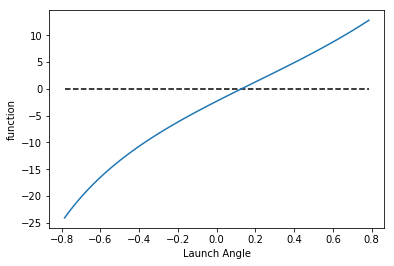

In [26]:
import matplotlib.pyplot as plt
foo = np.linspace(-np.pi/4, np.pi/4, 100)
plt.plot(foo,function(foo))
plt.hlines(y=0, xmax= np.pi/4, xmin=-np.pi/4, linestyles='dashed')
plt.xlabel('Launch Angle')
plt.ylabel('function')
plt.show()

By plotting the function I'm trying to solve for I can get a general idea of where the solution should be (where the plot crosses the 'x' axis). Now I can use the program bisect to solve for theta

In [27]:
theta_launch = bisect(function, 0, 0.3)
print(theta_launch, np.rad2deg(theta_launch))

0.1280828475952148 7.338606595223153


This should be the angle that I want to throw the ball at to get a strike. To double check this Lets plot the trajectory of the ball. 

In [28]:
t =np.linspace(0,1,100)
x_launch = np.array([0, 1.778])
v_0 = 22.35
x = x_launch[0] + v_0 * np.cos(theta_launch)*t
y = x_launch[1] + v_0 * np.sin(theta_launch)*t + 0.5 * (-9.8) * t**2

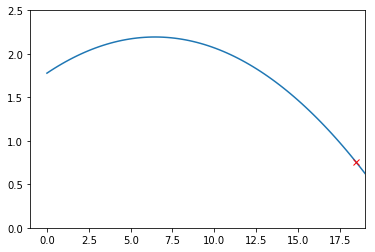

In [29]:
plt.plot(x,y)
plt.ylim(0,2.5)
plt.xlim(-1,19)
plt.plot(x_sz[0],x_sz[1], 'x', color = 'red')

The red x is the strike point, and our trajectory passes right through it!

### b)

Part 'b' is the exact same process but our initial conditions are slightly different. So to do this I'll just rewrite 'function'

In [30]:
import numpy as np
def function_b(theta):
    x_launch = np.array([0, 1.9818]) #Initial position (m)
    x_sz = np.array([18.44, .762]) #Final position (m) 
    v_0 = 45.06 #Throwing speed (m/s)
    delta_y = x_sz[1] - x_launch[1]
    delta_x = x_sz[0] - x_launch[0]
    
    return delta_x * np.tan(theta) + 0.5 * (-9.8) * (delta_x / (v_0 * np.cos(theta)))**2 - delta_y

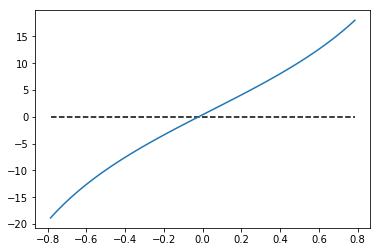

In [33]:
foo = np.linspace(-np.pi/4, np.pi/4, 100)
plt.plot(foo,function_b(foo))
plt.hlines(y=0, xmax= np.pi/4, xmin=-np.pi/4, linestyles='dashed')
plt.show()

In [34]:
theta_launch = bisect(function_b, -.1, 0.3)
print(theta_launch, np.rad2deg(theta_launch))

-0.021623897552490237 -1.2389580663809612


In [35]:
t =np.linspace(0,1,100)
x_launch = np.array([0, 1.9818]) #Initial position (m)
v_0 = 45.06 
x = x_launch[0] + v_0 * np.cos(theta_launch)*t
y = x_launch[1] + v_0 * np.sin(theta_launch)*t + 0.5 * (-9.8) * t**2

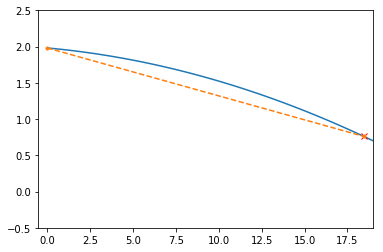

In [38]:
plt.plot(x,y)
plt.ylim(-0.5,2.5)
plt.xlim(-0.5,19)
plt.plot(x_sz[0],x_sz[1], 'x', color = 'red')
plt.plot([x_launch[0],x_sz[0]], [x_launch[1],x_sz[1]], '.--')
plt.show()

For fun I added a strait line for comparison